In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import resample


In [6]:
import pandas as pd
full_data = pd.read_csv('C:/Users/Yusayr Khan/Downloads/KaggleData/weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day
full_data.drop(['Date'], axis = 1,inplace=True) 
full_data.head()

C:\Users\Yusayr Khan\AppData\Local\Temp\ipykernel_14784\3816733608.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  full_data['Date'] = pd.to_datetime(full_data['Date'])


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,1,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,2,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,3,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,4,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,5,12


In [8]:
full_data.shape

(142193, 26)

In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [10]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,0.0,0.0,0,2008,1,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,0.0,0.0,0,2008,2,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,0.0,0.0,0,2008,3,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,0.0,1.0,0,2008,4,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,0.0,0.2,0,2008,5,12


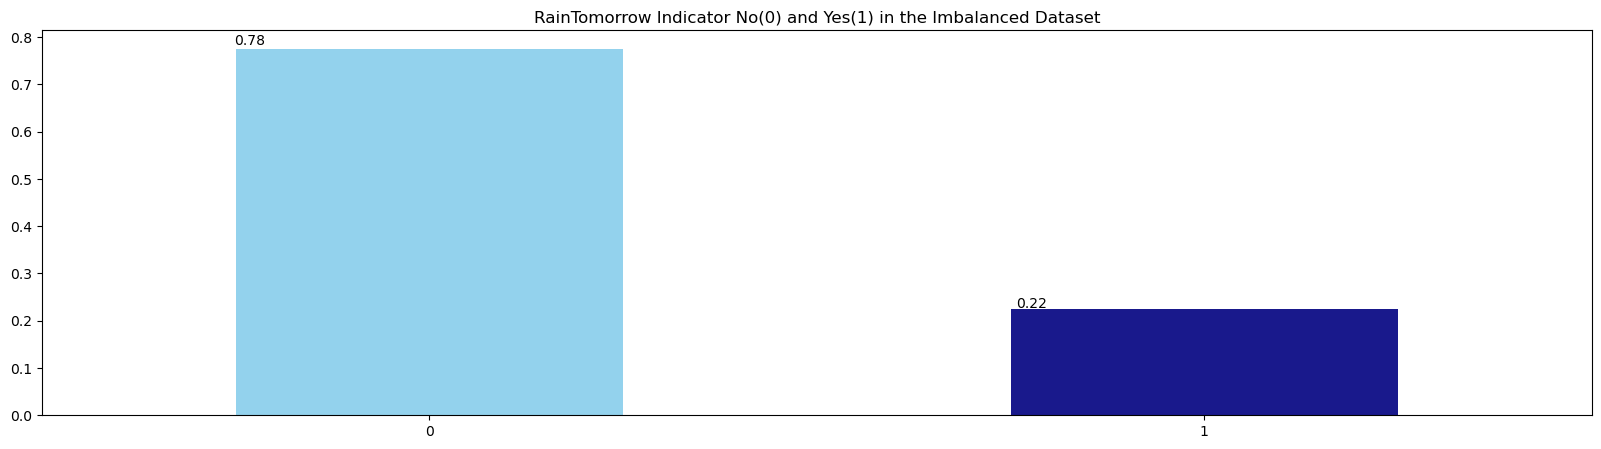

In [11]:

fig = plt.figure(figsize = (20,5))
ax=full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [12]:

# Assuming your dataset is stored in a variable named 'full_data'
# Oversample the minority class (RainTomorrow = 1)
no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)

# Concatenate the oversampled minority class with the majority class
oversampled = pd.concat([no, yes_oversampled])



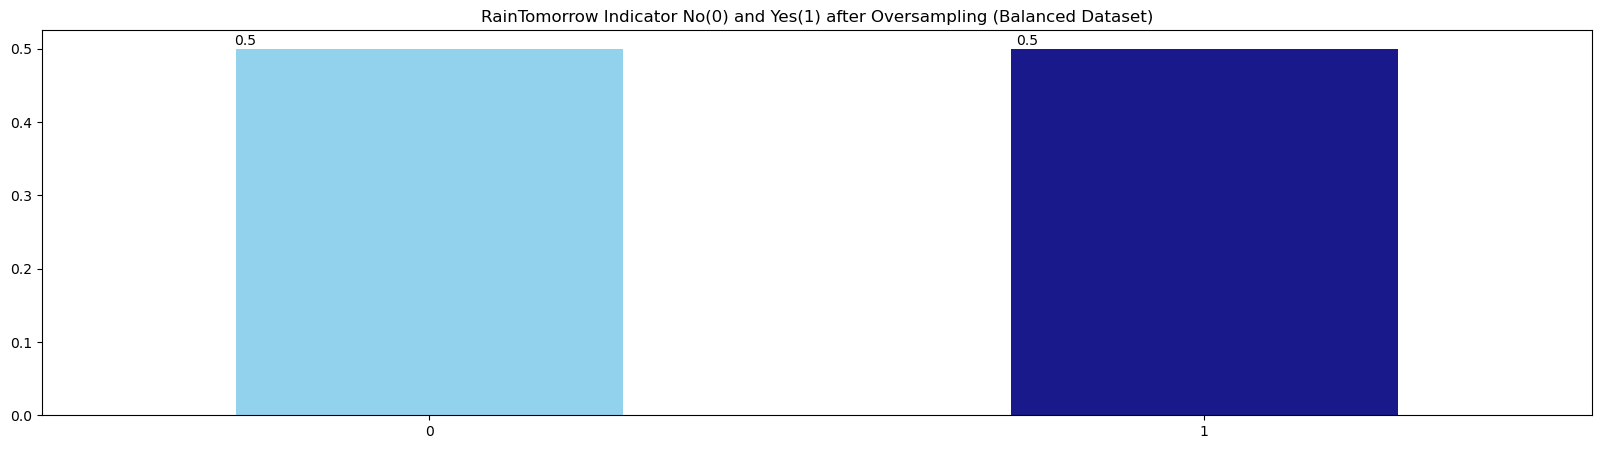

In [13]:
fig = plt.figure(figsize=(20, 5))
ax = oversampled.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.show()


In [14]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,104711,0.474596
Evaporation,95325,0.432054
Cloud3pm,85658,0.388239
Cloud9am,81388,0.368886
Pressure9am,21620,0.097991


In [15]:
oversampled.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [16]:
# Impute categorical var with Mode
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [17]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [18]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [19]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Location         25.000000
MinTemp           9.200000
MaxTemp          10.200000
Rainfall          2.400000
Evaporation       4.116556
Sunshine          5.904994
WindGustDir       9.000000
WindGustSpeed    19.000000
WindDir9am        8.000000
WindDir3pm        8.000000
WindSpeed9am     13.000000
WindSpeed3pm     11.000000
Humidity9am      26.000000
Humidity3pm      30.000000
Pressure9am       8.703616
Pressure3pm       8.843633
Cloud9am          4.000000
Cloud3pm          3.693314
Temp9am           9.300000
Temp3pm           9.800000
RainToday         1.000000
RISK_MM           5.200000
RainTomorrow      1.000000
year              5.000000
month             5.000000
day              15.000000
dtype: float64


In [20]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156798, 26)

In [21]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [22]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Humidity3pm', 'Cloud3pm', 'RISK_MM']
[1.58650406e-03 1.92976576e-03 2.09248786e-03 6.60434180e-03
 2.01394093e-03 4.32185430e-02 1.27352578e-03 7.29880644e-03
 1.17027386e-03 1.34004167e-03 1.00302713e-03 1.35772829e-03
 2.27001096e-03 4.69711849e-02 5.44097906e-03 1.04955184e-02
 1.91720255e-02 6.39155672e-02 2.03309237e-03 3.63535167e-03
 3.37852744e-03 7.69148650e-01 7.53472287e-04 7.94724260e-04
 1.10190910e-03]


In [24]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [39]:
import time
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay as plot_matrix
from sklearn.metrics import roc_curve
  

#from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    #Plot scores
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    # Plot the confusion matrix using ConfusionMatrixDisplay
    display = plot_matrix.from_estimator(model, X_test, y_test, display_labels=model.classes_, cmap=plt.cm.Blues)
    #display.plot(cmap=plt.cm.Blues)
    
    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 0.7881696428571429
ROC Area under Curve = 0.7684965183457936
Cohen's Kappa = 0.5467572935326102
Time taken = 3.3837294578552246
              precision    recall  f1-score   support

         0.0    0.80686   0.85804   0.83167     19125
         1.0    0.75367   0.67895   0.71437     12235

    accuracy                        0.78817     31360
   macro avg    0.78027   0.76850   0.77302     31360
weighted avg    0.78611   0.78817   0.78590     31360



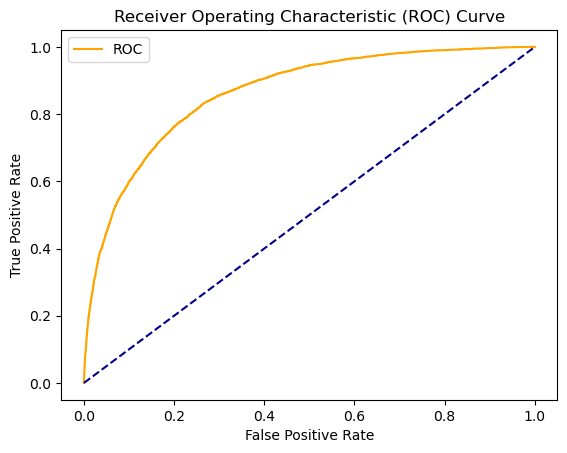

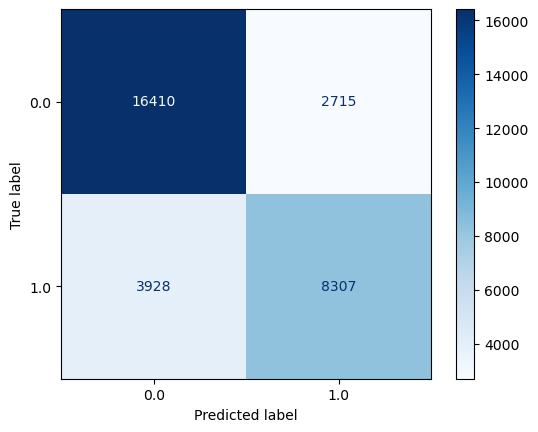

In [40]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8650191326530612
ROC Area under Curve = 0.8652030310557679
Cohen's Kappa = 0.7202788974494103
Time taken = 0.6261911392211914
              precision    recall  f1-score   support

         0.0    0.90980   0.86437   0.88650     19125
         1.0    0.80334   0.86604   0.83351     12235

    accuracy                        0.86502     31360
   macro avg    0.85657   0.86520   0.86000     31360
weighted avg    0.86826   0.86502   0.86583     31360



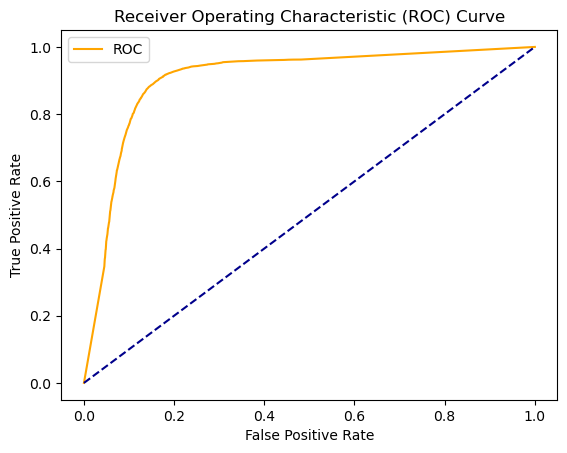

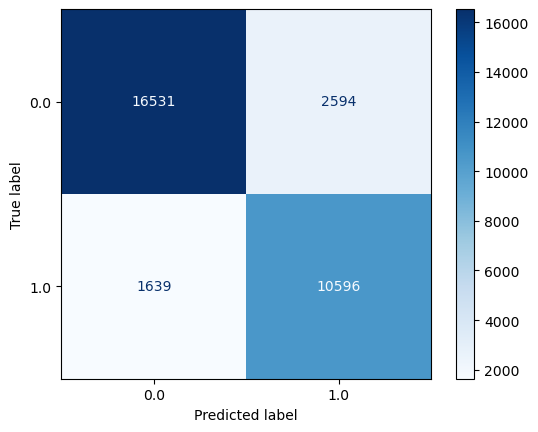

In [41]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)



In [34]:
pip install xgboost

     --------------------------------------- 99.7/99.7 MB 12.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Accuracy = 0.8859375
ROC Area under Curve = 0.8794235652032233
Cohen's Kappa = 0.7599547911409947
Time taken = 409.4665689468384
              precision    recall  f1-score   support

         0.0    0.90439   0.90907   0.90673     19125
         1.0    0.85671   0.84978   0.85323     12235

    accuracy                        0.88594     31360
   macro avg    0.88055   0.87942   0.87998     31360
weighted avg    0.88579   0.88594   0.88585     31360



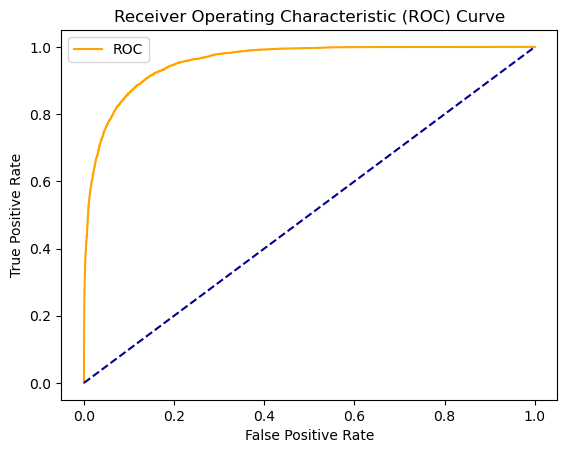

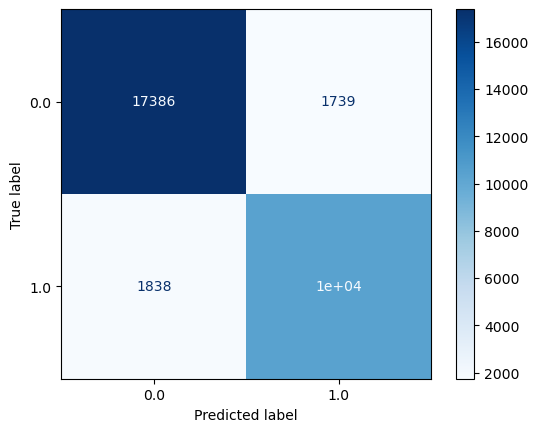

In [64]:
# Neural Network

from sklearn.neural_network import MLPClassifier, MLPRegressor


# Example parameters for MLPClassifier
params_nn = {
    'hidden_layer_sizes': (30, 30, 30),
    'activation': 'logistic',
    'solver': 'lbfgs',
    'max_iter': 500
}

# Create an MLPClassifier instance
model_nn = MLPClassifier(**params_nn)

# You can now use model_nn for classification tasks.

model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.9355867346938775
ROC Area under Curve = 0.9361181652336727
Cohen's Kappa = 0.8656600416007847
Time taken = 109.5464494228363
              precision    recall  f1-score   support

         0.0    0.95959   0.93370   0.94647     19125
         1.0    0.90056   0.93854   0.91915     12235

    accuracy                        0.93559     31360
   macro avg    0.93007   0.93612   0.93281     31360
weighted avg    0.93656   0.93559   0.93581     31360



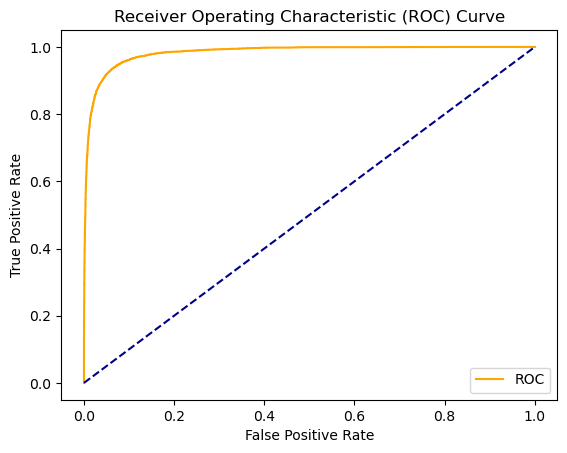

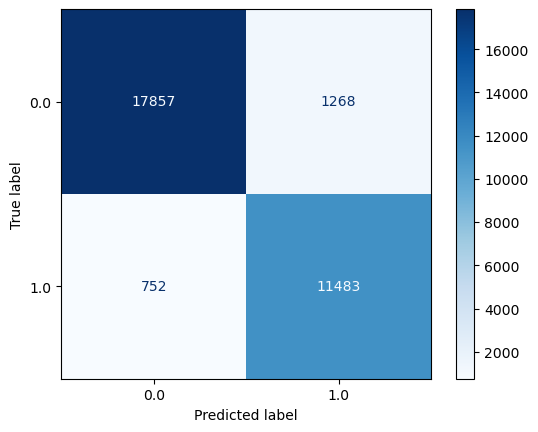

In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 48941, number of negative: 76497
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4308
[LightGBM] [Info] Number of data points in the train set: 125438, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390161 -> initscore=-0.446636
[LightGBM] [Info] Start training from score -0.446636
Accuracy = 0.8678890306122449
ROC Area under Curve = 0.8599738455251329
Cohen's Kappa = 0.7217008648781338
Time taken = 2.2794570922851562
              precision    recall  f1-score   support

         0.0    0.88834   0.89600   0.89215     19125
         1.0    0.83521   0.82395   0.82954     12235

    accuracy                        0.86789     31360
   macro avg    0.86177   0.85997   0.86085     31360
weighted avg    0.86761   0.86789   0.86772     31360



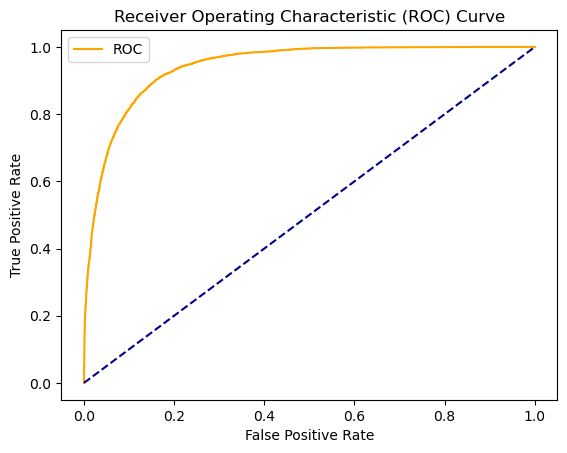

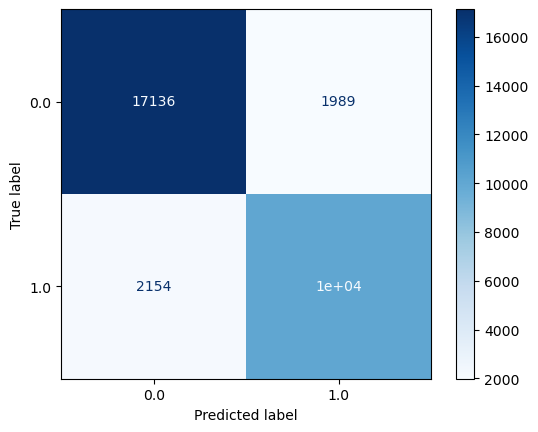

In [42]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)


Accuracy = 0.9494260204081633
ROC Area under Curve = 0.953353600914552
Cohen's Kappa = 0.8950842534008945
Time taken = 294.68991446495056
              precision    recall  f1-score   support

         0.0    0.98070   0.93548   0.95756     19125
         1.0    0.90592   0.97123   0.93744     12235

    accuracy                        0.94943     31360
   macro avg    0.94331   0.95335   0.94750     31360
weighted avg    0.95153   0.94943   0.94971     31360



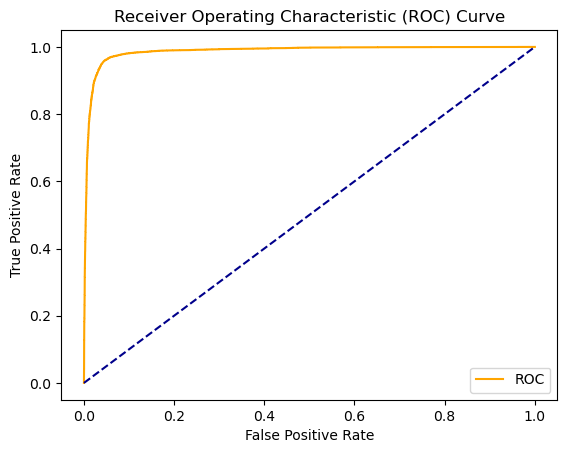

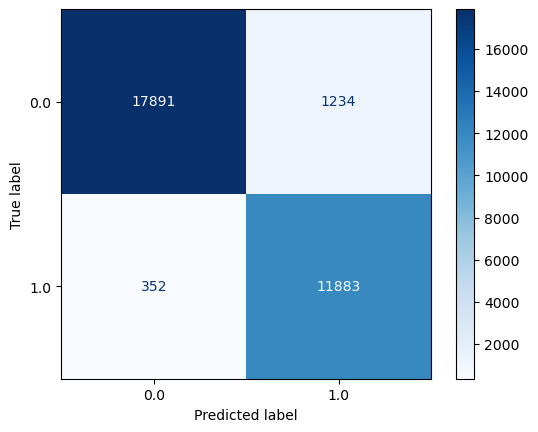

In [44]:
# Catboost

import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)


Accuracy = 0.9464285714285714
ROC Area under Curve = 0.9483638014802707
Cohen's Kappa = 0.8884607703597234
Time taken = 17.04063892364502
              precision    recall  f1-score   support

         0.0    0.97166   0.93956   0.95534     19125
         1.0    0.91016   0.95717   0.93307     12235

    accuracy                        0.94643     31360
   macro avg    0.94091   0.94836   0.94421     31360
weighted avg    0.94767   0.94643   0.94665     31360



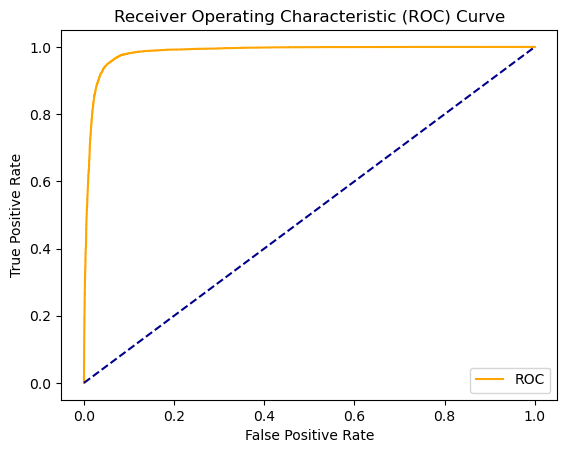

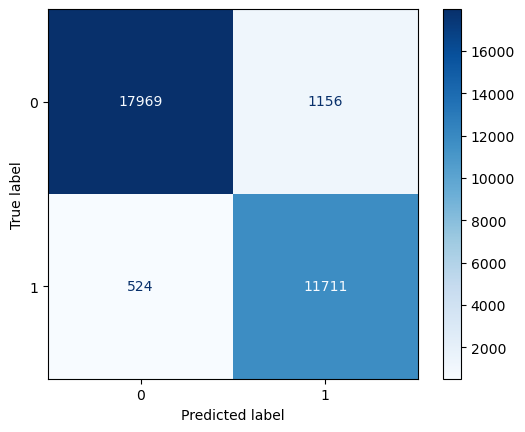

In [43]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


In [49]:
pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


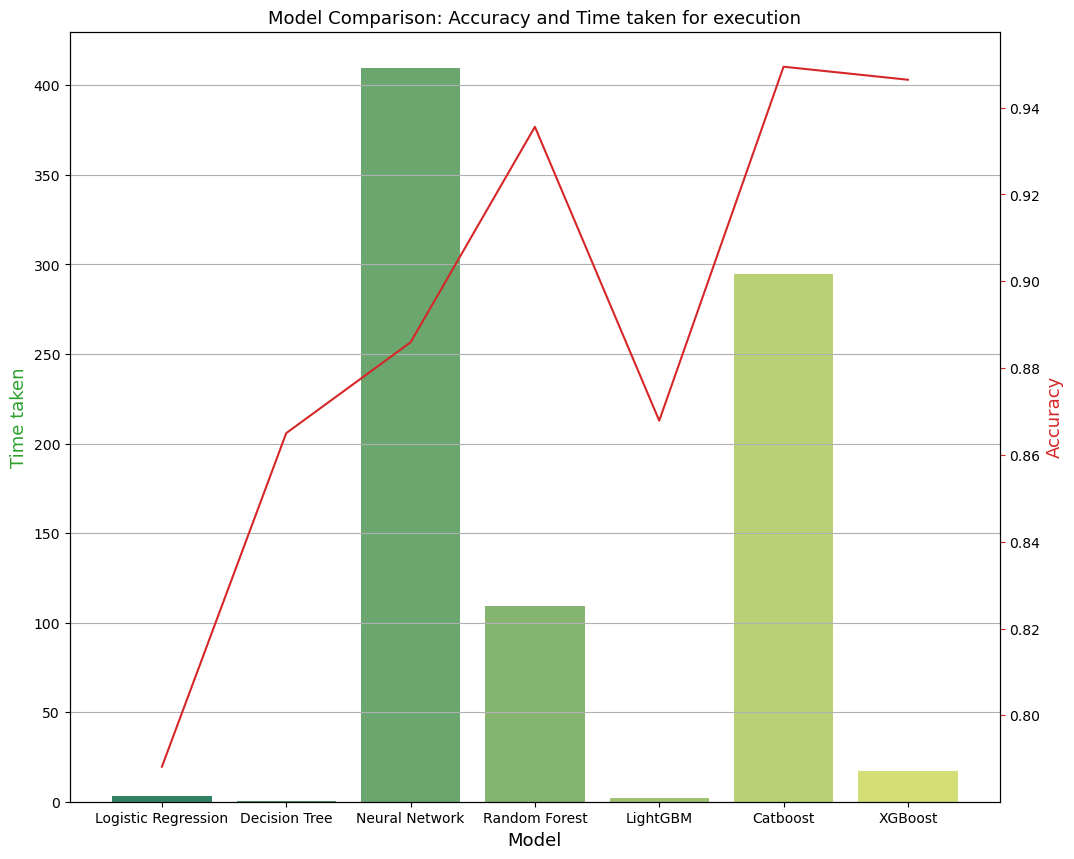

In [70]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

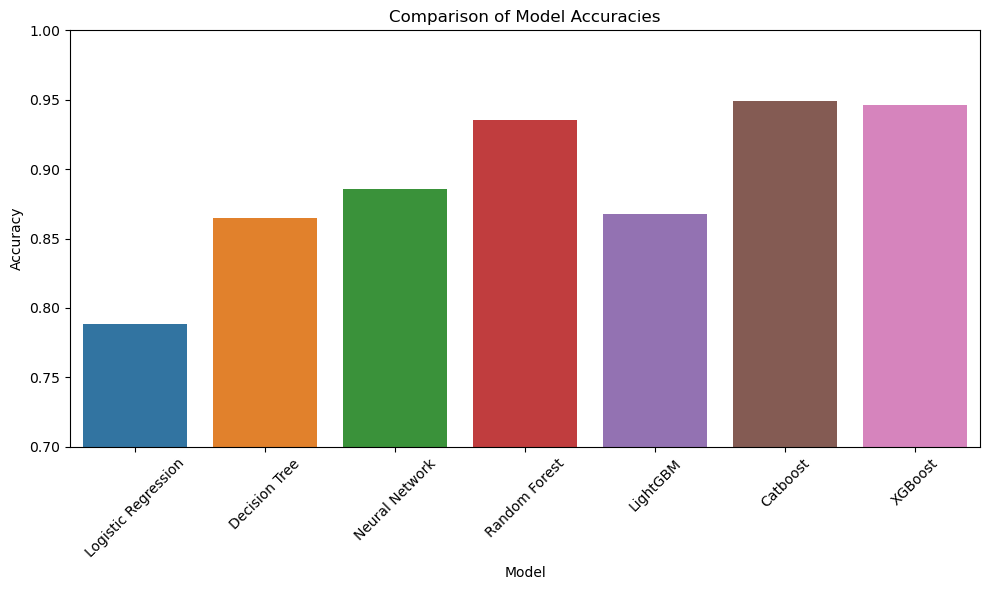

In [69]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
